In [282]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
#import warnings
#warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
MouseData = pd.read_csv(mouse_drug_data_to_load)
TrialData = pd.read_csv(clinical_trial_data_to_load)
#print(MouseData.head())
#print(TrialData.head())

# Combine the data into a single dataset
CompleteDrugData = pd.merge(MouseData, TrialData, on='Mouse ID')

# Display the data table for preview
CompleteDrugData.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [283]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
'''
n = 0
MeanDataDF = pd.DataFrame()
for drug in DrugList:
    DrugDF = CompleteDrugData.loc[CompleteDrugData['Drug'] == drug]
    GroupByDF = DrugDF.groupby('Timepoint')
    MeanOverTimeDF = pd.DataFrame(GroupByDF['Tumor Volume (mm3)'].mean())
    if n == 0:
        MeanDataDF['Timepoint'] = MeanOverTimeDF.index
    MeanDataDF[drug] = list(MeanOverTimeDF['Tumor Volume (mm3)'])
    n += 1
'''
GroupByDF = CompleteDrugData.groupby(["Drug", "Timepoint"]).mean()['Tumor Volume (mm3)']
MeanDataDF = pd.DataFrame(GroupByDF)
# Convert to DataFrame

# Preview DataFrame
MeanDataDF.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [284]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
'''
SEMDataDF = pd.DataFrame()
SEMDataDF['Timepoint'] = MeanOverTimeDF.index
for drug in DrugList:
    SEMs = []
    for timepoint in MeanDataDF['Timepoint']:
        SEMpleData = list(CompleteDrugData.loc[(CompleteDrugData['Drug'] == drug) & (CompleteDrugData['Timepoint'] == timepoint), 'Tumor Volume (mm3)'])
        SEM = sem(SEMpleData)
        SEMs.append(SEM)
    SEMDataDF[drug] = SEMs
'''
GroupByDF = CompleteDrugData.groupby(["Drug", "Timepoint"]).sem()['Tumor Volume (mm3)']
SEMDataDF = pd.DataFrame(GroupByDF)
# Convert to DataFrame

# Preview DataFrame
SEMDataDF.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [285]:
# Minor Data Munging to Re-Format the Data Frames
MeanDataDF = MeanDataDF.pivot_table(values = "Tumor Volume (mm3)", columns = "Drug", index = "Timepoint")
SEMDataDF = SEMDataDF.pivot_table(values = "Tumor Volume (mm3)", columns = "Drug", index = "Timepoint")
# Preview that Reformatting worked
MeanDataDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [286]:
# Preview that Reformatting worked
SEMDataDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


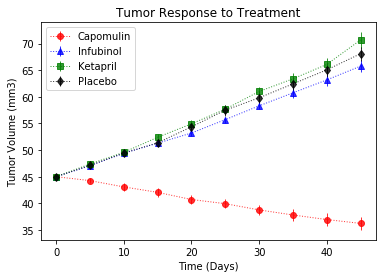

In [287]:
# Generate the Plot (with Error Bars)
markers = ['o:r','^:b','s:g','d:k']
fig = plt.figure()
ax = fig.add_subplot()
x = 0
GraphList = ['Capomulin','Infubinol','Ketapril','Placebo']
for drug in GraphList:
    ax.errorbar(MeanDataDF.index, MeanDataDF[drug], yerr=SEMDataDF[drug], fmt=markers[x], label=drug, alpha=0.8, lw=1)
    x += 1
    if x == 4:
        x = 0
plt.legend()
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Save the Figure
plt.savefig("Tumor Response to Treatment.png")

# Show the figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [288]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
'''
TempDFs = []
for drug in DrugList:
    DrugDF = CompleteDrugData.loc[CompleteDrugData['Drug'] == drug]
    GroupByDF = DrugDF.groupby('Timepoint')
    MetaGroupDF = pd.DataFrame(GroupByDF['Metastatic Sites'].mean())
    TempDF = pd.DataFrame()
    TempDF['Timepoint'] = MetaGroupDF.index
    TempDF['Metastatic Sites'] = list(MetaGroupDF['Metastatic Sites'])
    TempDF = TempDF.set_index('Timepoint')
    TempDFs.append(TempDF)
# Convert to DataFrame
MetaDataDF = pd.concat(TempDFs, keys=DrugList, names=['Drug'])
MetaDataDF.sort_index(ascending=False)
'''
GroupByDF = CompleteDrugData.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
MetaDataDF = pd.DataFrame(GroupByDF)
# Preview DataFrame
MetaDataDF.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [289]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
GroupByDF = CompleteDrugData.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
SEMDataDF = pd.DataFrame(GroupByDF)
# Preview DataFrame
SEMDataDF.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [290]:
# Minor Data Munging to Re-Format the Data Frames
MetaDataDF = MetaDataDF.pivot_table(values = "Metastatic Sites", columns = "Drug", index = "Timepoint")
SEMDataDF = SEMDataDF.pivot_table(values = "Metastatic Sites", columns = "Drug", index = "Timepoint")
# Preview that Reformatting worked
MetaDataDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [291]:
SEMDataDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


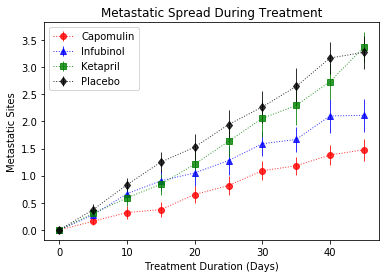

In [292]:
# Generate the Plot (with Error Bars)
fig = plt.figure()
ax = fig.add_subplot()
x = 0
GraphList = ['Capomulin','Infubinol','Ketapril','Placebo']
for drug in GraphList:
    ax.errorbar(MetaDataDF.index, MetaDataDF[drug], yerr=SEMDataDF[drug], fmt=markers[x], label=drug, alpha=0.8, lw=1)
    x += 1
    if x == 4:
        x = 0
plt.legend()
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')

# Save the Figure
plt.savefig("Metastatic Spread During Treatment")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [293]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
GroupByDF = CompleteDrugData.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
MiceDF = pd.DataFrame(GroupByDF)
MiceDF = MiceDF.rename(columns = {'Mouse ID':'Mouse Count'})

# Preview DataFrame
MiceDF.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [294]:
# Minor Data Munging to Re-Format the Data Frames
MiceDF = MiceDF.pivot_table(values = "Mouse Count", columns = "Drug", index = "Timepoint")

# Preview the Data Frame
MiceDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


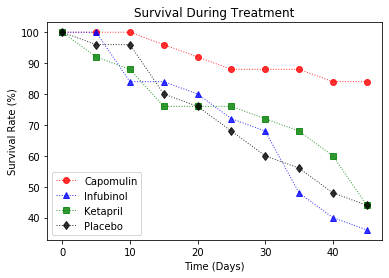

In [295]:
# Generate the Plot (Accounting for percentages)
fig = plt.figure()
ax = fig.add_subplot()
x = 0
GraphList = ['Capomulin','Infubinol','Ketapril','Placebo']
for drug in GraphList:
    ax.errorbar(MiceDF.index, MiceDF[drug]/MiceDF[drug].iloc[0]*100, fmt=markers[x], label=drug, alpha=0.8, lw=1)
    x += 1
    if x == 4:
        x = 0
plt.legend()
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')

# Save the Figure
plt.savefig("Survival During Treatment")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [296]:
# Calculate the percent changes for each drug
PercentChanges = (MeanDataDF.iloc[-1] - MeanDataDF.iloc[0]) / MeanDataDF.iloc[0] * 100

# Display the data to confirm
PercentChanges

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

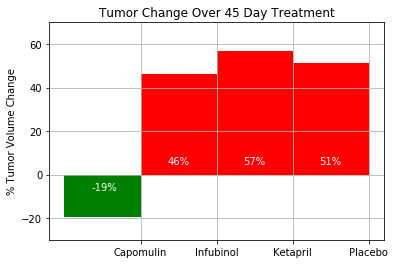

In [297]:
#Initialize graph
fig = plt.figure()
ax = fig.add_subplot()
x = -0.15

#Plot data points
for drug in GraphList:
    #conditional formatting
    if PercentChanges[drug] > 0:
        barcolor = 'red'
        y = 5
    else:
        barcolor = 'green'
        y = -7
    #Plot data in bar chart
    ax.bar(drug, PercentChanges[drug], width=1, color=barcolor)
    #Label bar with percentage
    ax.text(x, y, "{:.0f}%".format(PercentChanges[drug]), color="white")
    x += 1

#Format graph
ax.grid()
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_ylim(-30,70)
ax.set_xticks([0.5,1.5,2.5,3.5])
ax.set_xticklabels(GraphList)
yticks = [PercentChanges[drug] for drug in GraphList]

# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)